# Get MNIST data from pytorch

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


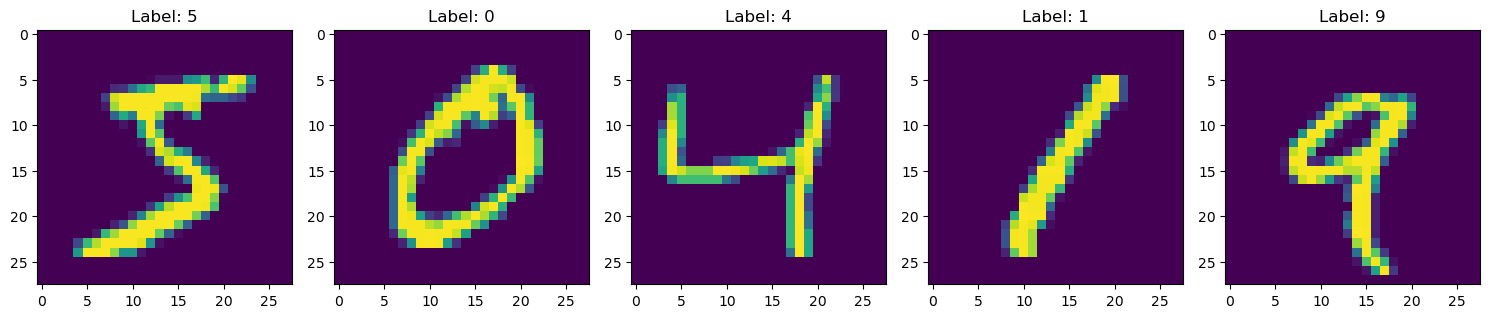

In [6]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from torchvision import datasets, transforms

# Define the transformation to convert images to PyTorch tensors
transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST dataset with the specified transformation
mnist_pytorch = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create a DataLoader to load the dataset in batches
train_loader_pytorch = torch.utils.data.DataLoader(mnist_pytorch, batch_size=1, shuffle=False)

# Create a figure to display the images
plt.figure(figsize=(15, 3))

# Print the first few images in a row
for i, (image, label) in enumerate(train_loader_pytorch):
    if i < 5:  # Print the first 5 samples
        plt.subplot(1, 5, i + 1)
        print(image[0].shape)
        plt.imshow(image[0].squeeze(), cmap='viridis')
        print(image[0].squeeze().shape)
        plt.title(f"Label: {label.item()}")
    else:
        break  # Exit the loop after printing 5 samples

plt.tight_layout()
plt.show()

## Show singular value decomposition of the data

In [7]:
# Step 1: Flatten all images into vectors
data_matrix = []
for image, _ in train_loader_pytorch:
    data_matrix.append(image.view(-1))  # Flatten the image (28x28 -> 784)

# Convert to a NumPy array for SVD
data_matrix = torch.stack(data_matrix).numpy()

# print shape of data matrix
print(data_matrix.shape)


(60000, 784)


In [8]:
# perform SVD
u, s, vh = np.linalg.svd(data_matrix, full_matrices=False)

# print shapes of U, S, and V^T
print(u.shape, s.shape, vh.shape)

(60000, 784) (784,) (784, 784)


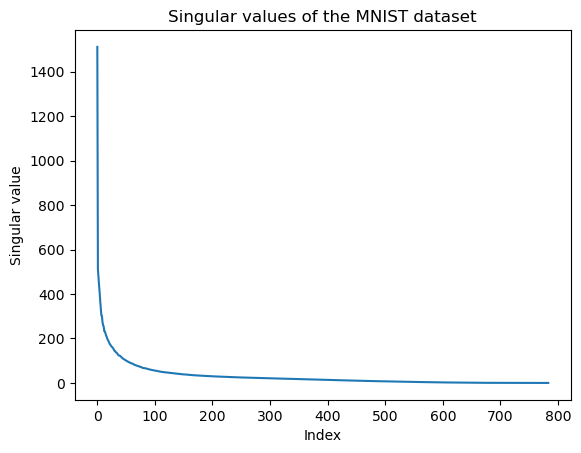

In [9]:
# plot the singular values
plt.plot(s)
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.title('Singular values of the MNIST dataset')
plt.show()


In [10]:
# Optionally: Print the proportion of variance captured by the first few singular values
total_variance = np.sum(s**2)
explained_variance = np.cumsum(s**2) / total_variance
original_variance_10 = explained_variance[9]
print(f"Proportion of variance explained by the first 10 singular values: {original_variance_10:.4f}")

Proportion of variance explained by the first 10 singular values: 0.6916


In [11]:
# use the first components to reconstruct the original data
n_components = [1, 10, 50, 100, 250, 500, 784]
reconstructed_images = []
for n in n_components:
    reconstructed_data = u[:, :n] @ np.diag(s[:n]) @ vh[:n, :]
    reconstructed_images.append(reconstructed_data)


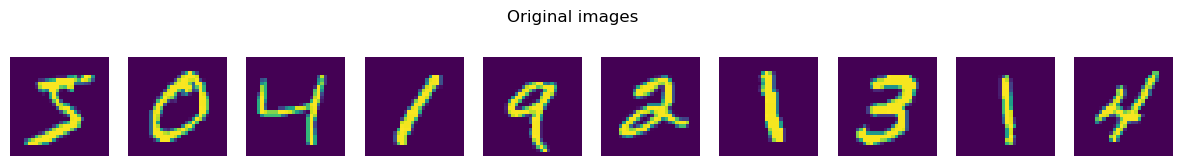

In [12]:
# plot the first 10 original images 
# 10 rows in dataset

plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(data_matrix[i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle('Original images')
plt.show()

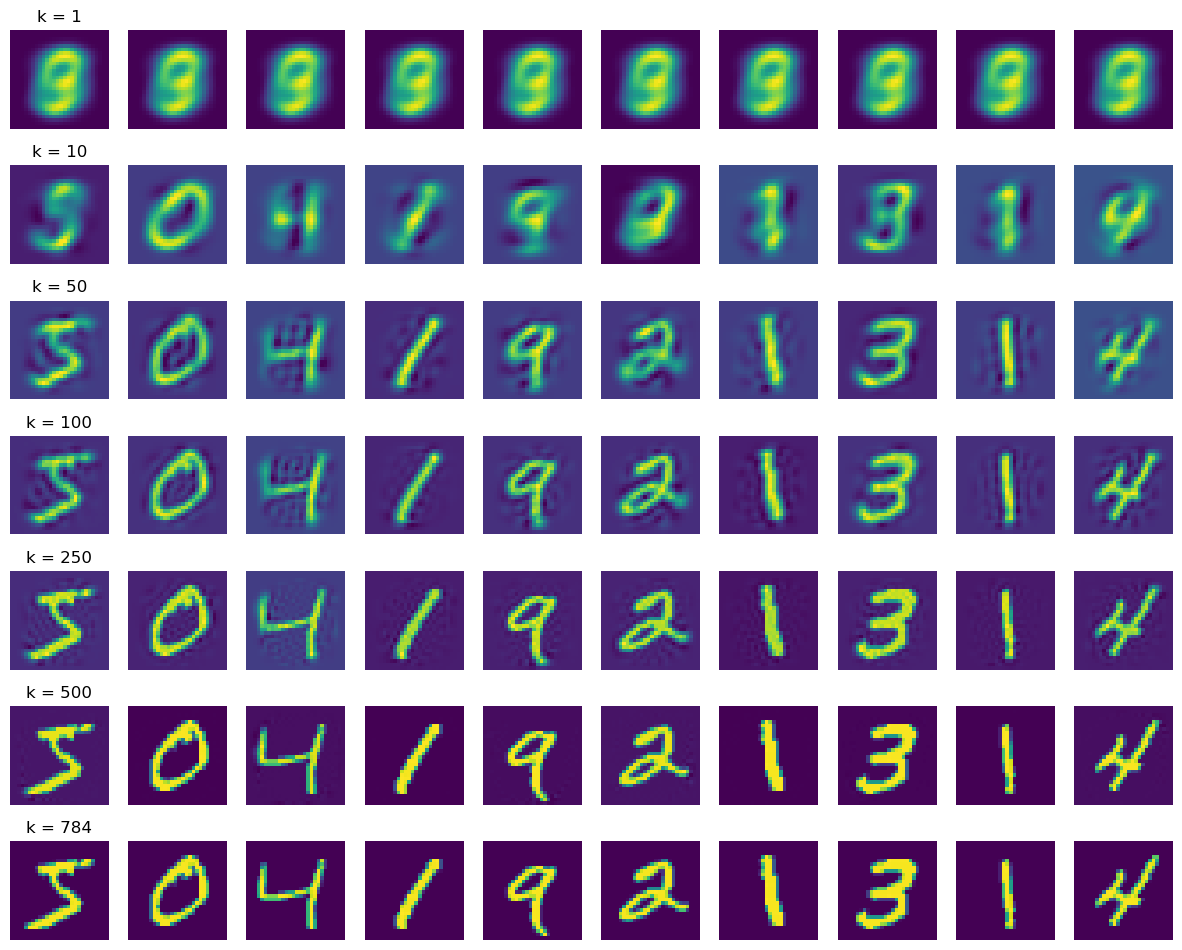

In [13]:
# plot the reconstructed images
plt.figure(figsize=(15, 12))
for i, n in enumerate(n_components):
    for j in range(10):
        plt.subplot(len(n_components), 10, i * 10 + j + 1)
        plt.imshow(reconstructed_images[i][j].reshape(28, 28), cmap='viridis')
        plt.axis('off')
        if j == 0:
            plt.title(f"k = {n}")
#plt.suptitle('Reconstructed images')
plt.show()



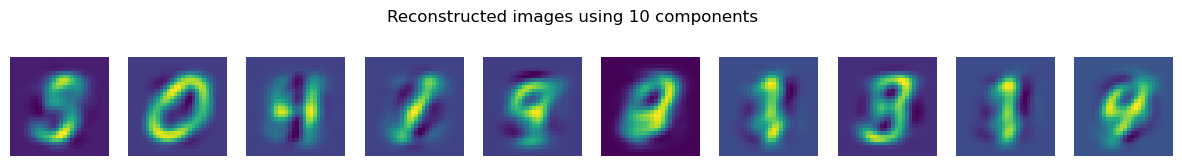

In [14]:
# reconstruct the first 10 images using the first 10 components
reconstructed_images_10 = u[:, :10] @ np.diag(s[:10]) @ vh[:10, :]
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(reconstructed_images_10[i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle('Reconstructed images using 10 components')
plt.show()


In [15]:
# calculate the reconstruction error between the original and reconstructed images 10
reconstruction_error = np.linalg.norm(data_matrix - reconstructed_images_10, axis=1)

# calculate the average reconstruction error
average_reconstruction_error = np.mean(reconstruction_error)
print(f"Average reconstruction error using 10 components: {average_reconstruction_error:.4f}")

Average reconstruction error using 10 components: 5.1306


## Get all samples for each digit

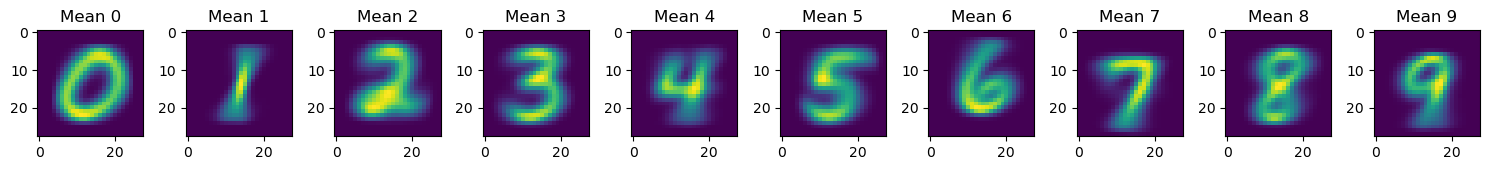

In [16]:
# get all samples of each digit
samples = {i: [] for i in range(10)}
for image, label in train_loader_pytorch:
    samples[label.item()].append(image.view(-1))

# convert to numpy array
for i in range(10):
    samples[i] = torch.stack(samples[i]).numpy()

# calculate the mean of each digit
means = {i: np.mean(samples[i], axis=0) for i in range(10)}

# plot the mean of each digit
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(means[i].reshape(28, 28), cmap='viridis')
    plt.title(f"Mean {i}")
plt.tight_layout()
plt.show()


In [17]:
# perform svd on each digit
svd_results = {i: np.linalg.svd(samples[i], full_matrices=False) for i in range(10)}

In [18]:
# print shapes of U, S, and V^T for digit 0
print(svd_results.__len__())

print(svd_results[0][0].shape, svd_results[0][1].shape, svd_results[0][2].shape)

10
(5923, 784) (784,) (784, 784)


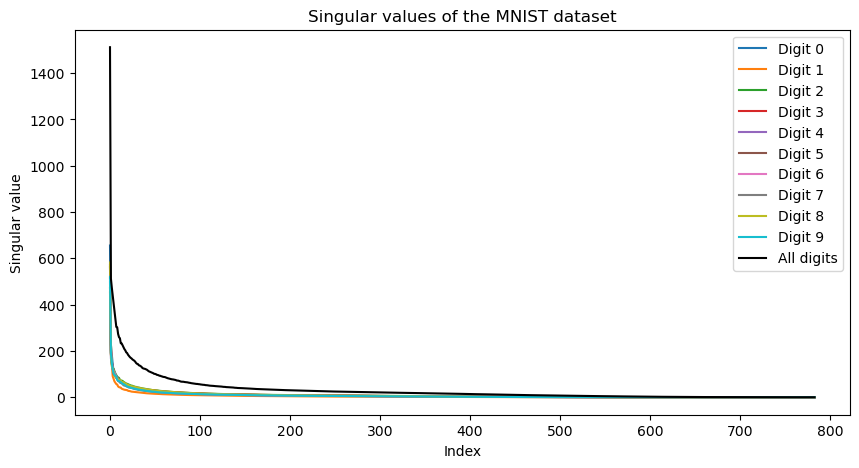

In [19]:
# plot the singular values of each digit on the same plot
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.plot(svd_results[i][1], label=f"Digit {i}")
# plot the singular values of the entire dataset
plt.plot(s, label='All digits', color='black')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.title('Singular values of the MNIST dataset')
plt.show()



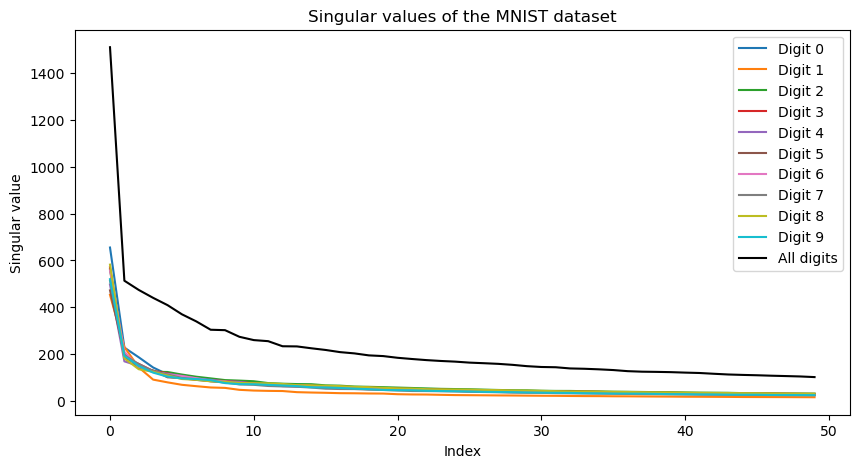

In [20]:
# plot all the singular values on the same plot
# limit the number of singular values to plot to 50
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.plot(svd_results[i][1][:50], label=f"Digit {i}")
plt.plot(s[:50], label='All digits', color='black')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.title('Singular values of the MNIST dataset')

plt.show()

In [21]:
# calculate the proportion of variance explained by the first 10 components of each digit
explained_variance_digits = {i: np.cumsum(svd_results[i][1]**2) / np.sum(svd_results[i][1]**2) for i in range(10)}

# print the proportion of variance explained by the first 10 components of each digit
for i in range(10):
    print(f"Explained variance by first 10 components of digit {i}: {explained_variance_digits[i][9]:.4f}")

    

Explained variance by first 10 components of digit 0: 0.8419
Explained variance by first 10 components of digit 1: 0.8942
Explained variance by first 10 components of digit 2: 0.7545
Explained variance by first 10 components of digit 3: 0.7789
Explained variance by first 10 components of digit 4: 0.7768
Explained variance by first 10 components of digit 5: 0.7497
Explained variance by first 10 components of digit 6: 0.8098
Explained variance by first 10 components of digit 7: 0.8095
Explained variance by first 10 components of digit 8: 0.7689
Explained variance by first 10 components of digit 9: 0.8034


In [22]:
# take the average of the explained_variance_digits[i][9] for all digits
average_explained_variance_all_digits = np.mean([explained_variance_digits[i][9] for i in range(10)])
print(f"Average explained variance by first 10 components of all digits: {average_explained_variance_all_digits:.4f}")

Average explained variance by first 10 components of all digits: 0.7988


In [23]:
# print the proportion of variance explained by the first 10 components of the entire dataset
print(f"Explained variance by first 10 components of all digits: {explained_variance[9]:.4f}")

Explained variance by first 10 components of all digits: 0.6916


In [24]:
# reconstruct the original data for each digit using the first 10 components
reconstructed_images_digits = {i: [] for i in range(10)}
for i in range(10):
    reconstructed_data = svd_results[i][0][:, :10] @ np.diag(svd_results[i][1][:10]) @ svd_results[i][2][:10, :]
    reconstructed_images_digits[i] = reconstructed_data

    

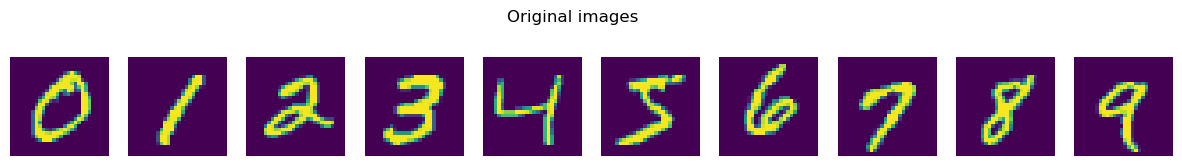

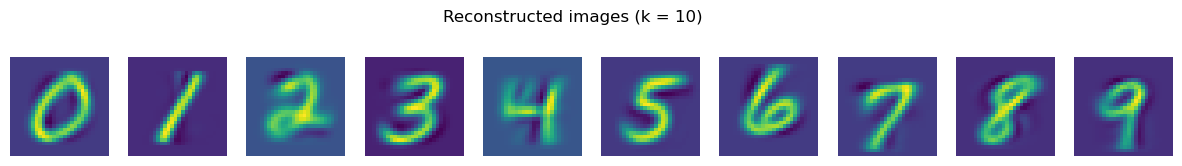

In [25]:
# plot the first original images of each digit
# and the reconstructed images using the first 10 components
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(samples[i][0].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle('Original images')
plt.show()

plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(reconstructed_images_digits[i][0].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle('Reconstructed images (k = 10)')
plt.show()


In [26]:
# calculate the reconstruction error for each digit using the first 10 components
reconstruction_error_digits = {i: np.linalg.norm(samples[i] - reconstructed_images_digits[i], axis=1) for i in range(10)}

# calculate the average reconstruction error for each digit
average_reconstruction_error_digits = {i: np.mean(reconstruction_error_digits[i]) for i in range(10)}

# print the average reconstruction error for each digit
for i in range(10):
    print(f"Average reconstruction error for digit {i}: {average_reconstruction_error_digits[i]:.4f}")
    

Average reconstruction error for digit 0: 4.2653
Average reconstruction error for digit 1: 2.2232
Average reconstruction error for digit 2: 4.9251
Average reconstruction error for digit 3: 4.5221
Average reconstruction error for digit 4: 4.1878
Average reconstruction error for digit 5: 4.5635
Average reconstruction error for digit 6: 4.1130
Average reconstruction error for digit 7: 3.7391
Average reconstruction error for digit 8: 4.7496
Average reconstruction error for digit 9: 3.9143


In [27]:
# get the average reconstruction error for all digits
average_reconstruction_error_all_digits = np.mean([average_reconstruction_error_digits[i] for i in range(10)])

# print the average reconstruction error for all digits
print(f"Average reconstruction error for all digits: {average_reconstruction_error_all_digits:.4f}")


Average reconstruction error for all digits: 4.1203


<Figure size 1000x500 with 0 Axes>

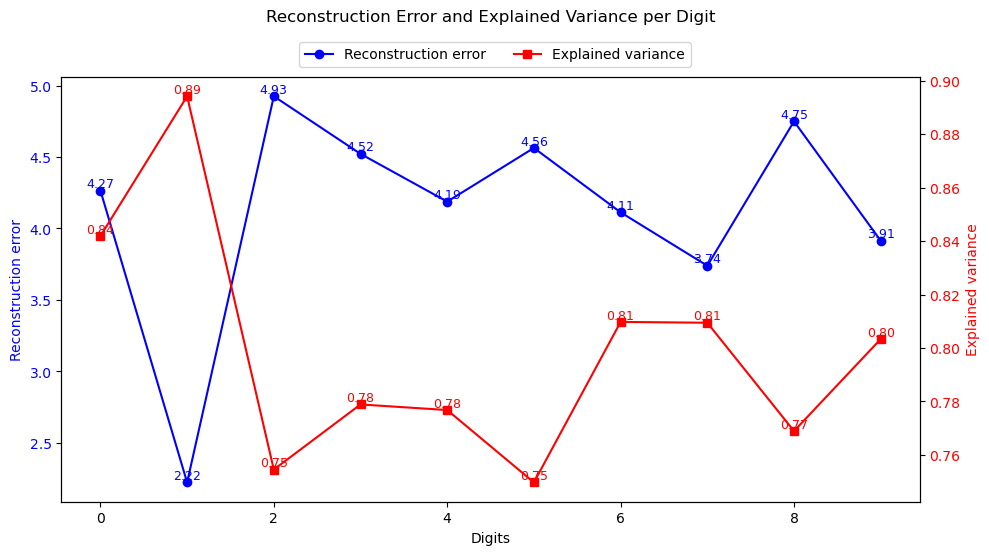

In [89]:
plt.figure(figsize=(10, 5))

# First axis: Reconstruction error
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(range(10), [average_reconstruction_error_digits[i] for i in range(10)], 
         label='Reconstruction error', marker='o', color='blue')
ax1.set_xlabel('Digits')
ax1.set_ylabel('Reconstruction error', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Annotate values for Reconstruction error
for i in range(10):
    ax1.text(i, average_reconstruction_error_digits[i], f"{average_reconstruction_error_digits[i]:.2f}",
             color='blue', ha='center', va='bottom', fontsize=9)

# Second axis: Explained variance
ax2 = ax1.twinx()
ax2.plot(range(10), [explained_variance_digits[i][9] for i in range(10)], 
         label='Explained variance', marker='s', color='red')
ax2.set_ylabel('Explained variance', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Annotate values for Explained variance
for i in range(10):
    ax2.text(i, explained_variance_digits[i][9], f"{explained_variance_digits[i][9]:.2f}",
             color='red', ha='center', va='bottom', fontsize=9)

# Legends
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.title("Reconstruction Error and Explained Variance per Digit", pad=40)
plt.show()


## Centering the data

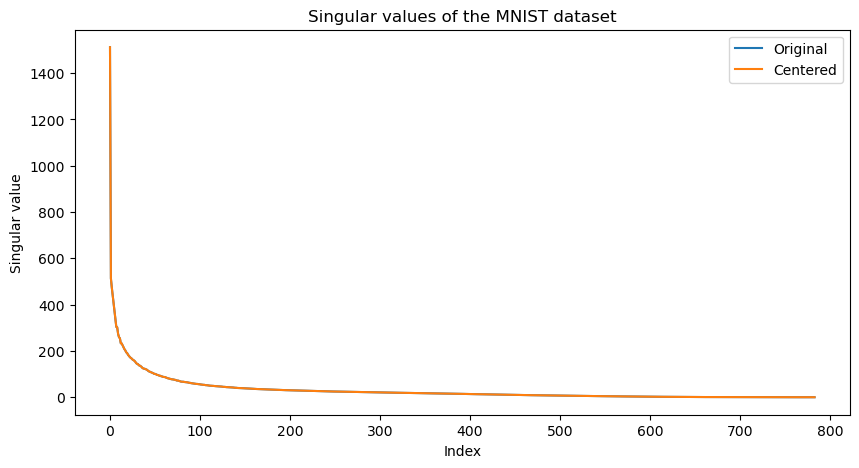

In [29]:
import numpy as np
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass

def center_image(image):
    image = image.numpy().squeeze()

    # calculate the center of brightness
    cy, cx = center_of_mass(image)
    #print(cy, cx)

    # calculate the shift needed to center the image
    shift_y = int(image.shape[0] / 2 - cy)
    shift_x = int(image.shape[1] / 2 - cx)
    #print(shift_y, shift_x)


    # shift the image
    centered_image = np.roll(image, shift = (shift_y, shift_x), axis = (0, 1))

    return centered_image



# Flatten the centered images and create a data matrix
data_matrix_centered = []
for image, _ in train_loader_pytorch:
    centered_image = center_image(image)
    data_matrix_centered.append(centered_image.flatten())

# Convert centered data to a numpy array
data_matrix_centered = np.array(data_matrix_centered)

# Perform SVD on the centered data
u_centered, s_centered, vh_centered = np.linalg.svd(data_matrix_centered, full_matrices=False)

# Plot the singular values beside the original singular values
plt.figure(figsize=(10, 5))
plt.plot(s, label='Original')
plt.plot(s_centered, label='Centered')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.title('Singular values of the MNIST dataset')
plt.legend()
plt.show()


In [30]:
# Calculate the proportion of variance explained by the first 10 components
total_variance_centered = np.sum(s_centered**2)
explained_variance_centered = np.cumsum(s_centered**2) / total_variance_centered
print(f"Explained variance by first 10 components: {explained_variance_centered[9]:.4f}")


Explained variance by first 10 components: 0.6916


## (Discard)Shifting to the brightest pixel in the center

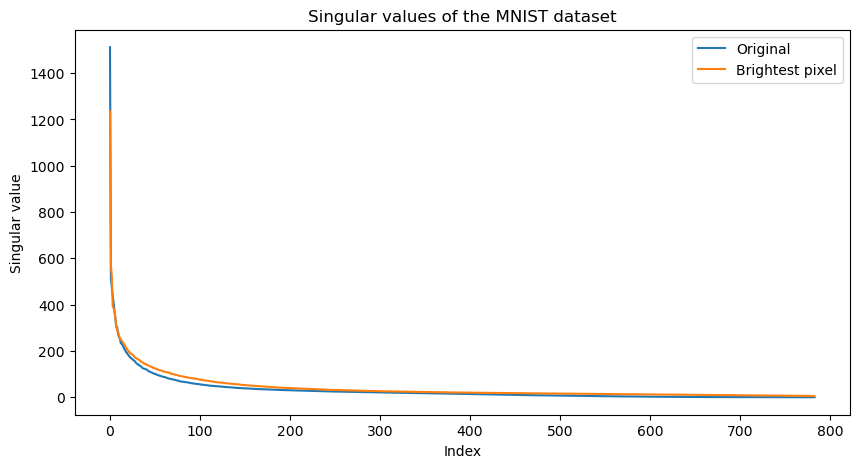

In [31]:
# get the brightest pixel in the image
# and shift the image so that the brightest pixel is at the center

def brightest_pixel_center(image):
    image = image.numpy().squeeze()

    # find the brightest pixel
    brightest_pixel = np.unravel_index(np.argmax(image), image.shape)

    # calculate the shift needed to center the image
    shift_y = int(image.shape[0] / 2 - brightest_pixel[0])
    shift_x = int(image.shape[1] / 2 - brightest_pixel[1])

    # shift the image
    centered_image = np.roll(image, shift = (shift_y, shift_x), axis = (0, 1))

    return centered_image

# create a new data matrix with the brightest pixel centered
data_matrix_brightest = []
for image, _ in train_loader_pytorch:
    centered_image = brightest_pixel_center(image)
    data_matrix_brightest.append(centered_image.flatten())

# Convert centered data to a numpy array
data_matrix_brightest = np.array(data_matrix_brightest)

# Perform SVD on the centered data
u_brightest, s_brightest, vh_brightest = np.linalg.svd(data_matrix_brightest, full_matrices=False)

# Plot the singular values beside the original singular values
plt.figure(figsize=(10, 5))
plt.plot(s, label='Original')
plt.plot(s_brightest, label='Brightest pixel')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.title('Singular values of the MNIST dataset')
plt.legend()
plt.show()



In [32]:
# Calculate the proportion of variance explained by the first 10 components
total_variance_brightest = np.sum(s_brightest**2)
explained_variance_brightest = np.cumsum(s_brightest**2) / total_variance_brightest
explained_variance_brightest_10 = explained_variance_brightest[9]
print(f"Explained variance by first 10 components: {explained_variance_brightest_10:.4f}")

Explained variance by first 10 components: 0.5579


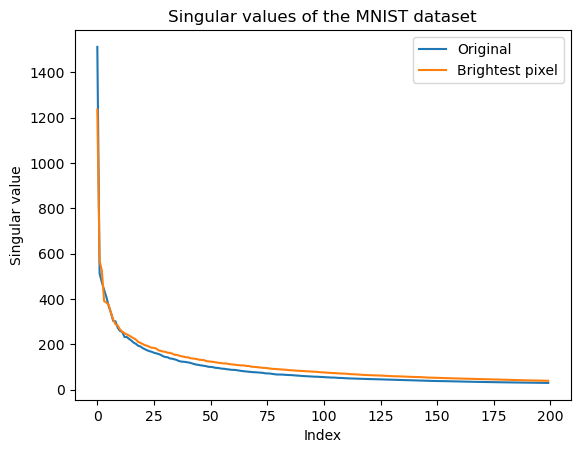

In [33]:
# plot the original singular values, and singular values from brightest pixel centered data
# only up to 200 singular value

plt.plot(s[:200], label='Original')
plt.plot(s_brightest[:200], label='Brightest pixel')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.title('Singular values of the MNIST dataset')
plt.legend()
plt.show()


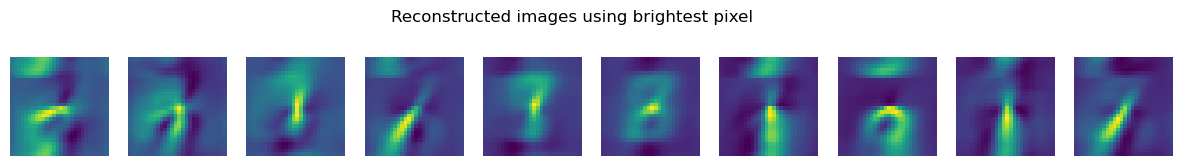

In [34]:
# reconstruct the original data using the first 10 components
reconstructed_images_brightest = u_brightest[:, :10] @ np.diag(s_brightest[:10]) @ vh_brightest[:10, :]

# plot the reconstructed images of the first 10 samples
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(reconstructed_images_brightest[i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle('Reconstructed images using brightest pixel')
plt.show()


In [35]:
# calculate the reconstruction error between the original and reconstructed images
reconstruction_error_brightest = np.linalg.norm(data_matrix - reconstructed_images_brightest, axis=1)

# calculate the average reconstruction error
average_reconstruction_error_brightest = np.mean(reconstruction_error_brightest)
print(f"Average reconstruction error using brightest pixel: {average_reconstruction_error_brightest:.4f}")


Average reconstruction error using brightest pixel: 8.8940


## Perform a random shiffting of the data

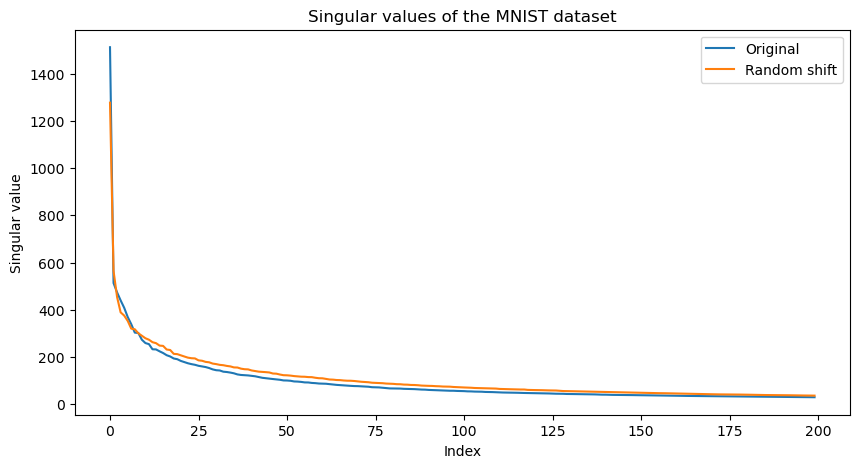

In [36]:
# perform a random shift of the image
def random_shift(image, max_shift=5):
    image = image.numpy().squeeze()

    # generate random shifts
    shift_y = np.random.randint(-max_shift, max_shift)
    shift_x = np.random.randint(-max_shift, max_shift)

    # shift the image
    shifted_image = np.roll(image, shift = (shift_y, shift_x), axis = (0, 1))

    return shifted_image

# create a new data matrix with the brightest pixel centered
data_matrix_random_shift = []
for image, _ in train_loader_pytorch:
    shifted_image = random_shift(image)
    data_matrix_random_shift.append(shifted_image.flatten())

# Convert centered data to a numpy array
data_matrix_random_shift = np.array(data_matrix_random_shift)

# Perform SVD on the centered data
u_random_shift, s_random_shift, vh_random_shift = np.linalg.svd(data_matrix_random_shift, full_matrices=False)

# Plot the singular values beside the original singular values, and singular values from brightest pixel centered data
# up to 200 singular value
plt.figure(figsize=(10, 5))
plt.plot(s[:200], label='Original')
#plt.plot(s_brightest[:200], label='Brightest pixel')
plt.plot(s_random_shift[:200], label='Random shift')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.title('Singular values of the MNIST dataset')
plt.legend()
plt.show()



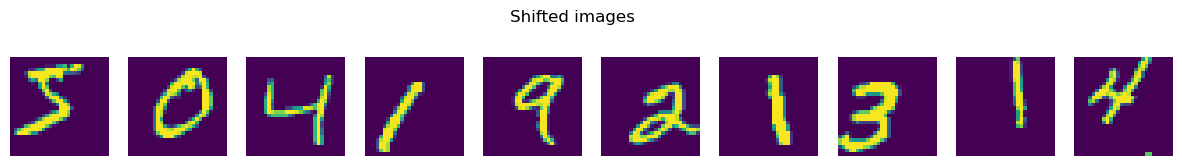

In [37]:
# show the first 10 images in the shifted data
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(data_matrix_random_shift[i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle('Shifted images')
plt.show()

In [38]:
# Calculate the proportion of variance explained by the first 10 components
total_variance_random_shift = np.sum(s_random_shift**2)
explained_variance_random_shift = np.cumsum(s_random_shift**2) / total_variance_random_shift
print(f"Explained variance by first 10 components (random shift): {explained_variance_random_shift[9]:.4f}")
# print the original variance explained by the first 10 components
print(f"Explained variance by first 10 components (original): {explained_variance[9]:.4f}")
# print the brightest pixel centered variance explained by the first 10 components
print(f"Explained variance by first 10 components (brightest pixel): {explained_variance_brightest[9]:.4f}")

Explained variance by first 10 components (random shift): 0.5602
Explained variance by first 10 components (original): 0.6916
Explained variance by first 10 components (brightest pixel): 0.5579


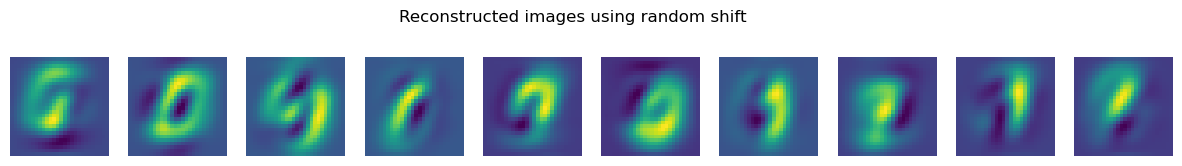

In [39]:
reconstructed_images_random_shift = u_random_shift[:, :10] @ np.diag(s_random_shift[:10]) @ vh_random_shift[:10, :]

# plot the reconstructed images of the first 10 samples
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(reconstructed_images_random_shift[i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle('Reconstructed images using random shift')
plt.show()


In [40]:
# calculate the reconstruction error between the original and reconstructed images
reconstruction_error_random_shift = np.linalg.norm(data_matrix - reconstructed_images_random_shift, axis=1)

# calculate the average reconstruction error
average_reconstruction_error_random_shift = np.mean(reconstruction_error_random_shift)
print(f"Average reconstruction error using random shift: {average_reconstruction_error_random_shift:.4f}")



Average reconstruction error using random shift: 8.1188


## Informations summary

In [41]:
explained_variance_random_shift_10 = explained_variance_random_shift[9]

print(f"Explained variance by first 10 components (centered): {original_variance_10:.4f}")
print(f"Explained variance by first 10 components (all digits): {average_explained_variance_all_digits:.4f}")
print(f"Explained variance by first 10 components (brightest pixel): {explained_variance_brightest_10:.4f}")
print(f"Explained variance by first 10 components (random shift): {explained_variance_random_shift_10:.4f}")





Explained variance by first 10 components (centered): 0.6916
Explained variance by first 10 components (all digits): 0.7988
Explained variance by first 10 components (brightest pixel): 0.5579
Explained variance by first 10 components (random shift): 0.5602


In [42]:
# print all the average reconstruction errors
print(f"Average reconstruction error using 10 components (centered): {average_reconstruction_error:.4f}")
print(f"Average reconstruction error for all digits: {average_reconstruction_error_all_digits:.4f}")
print(f"Average reconstruction error using brightest pixel: {average_reconstruction_error_brightest:.4f}")
print(f"Average reconstruction error using random shift: {average_reconstruction_error_random_shift:.4f}")


Average reconstruction error using 10 components (centered): 5.1306
Average reconstruction error for all digits: 4.1203
Average reconstruction error using brightest pixel: 8.8940
Average reconstruction error using random shift: 8.1188


## Max Pooling

In [43]:
# for each image, perform a maxpooling operation
# using a 2x2 kernel and stride of 2
def maxpool(image):
    image = image.numpy().squeeze()

    # perform maxpooling
    pooled_image = np.zeros((14, 14))
    for i in range(14):
        for j in range(14):
            pooled_image[i, j] = np.max(image[2*i:2*i+2, 2*j:2*j+2])

    return pooled_image

# for each row in original data matrix, perform maxpooling
data_matrix_maxpool = []
for image in data_matrix:
    image_tensor = torch.tensor(image).view(28, 28)
    pooled_image = maxpool(image_tensor)
    data_matrix_maxpool.append(pooled_image.flatten())

# Convert maxpooled data to a numpy array
data_matrix_maxpool = np.array(data_matrix_maxpool)
print(data_matrix_maxpool.shape)

(60000, 196)


In [44]:
print(28*28/(14*14))

4.0


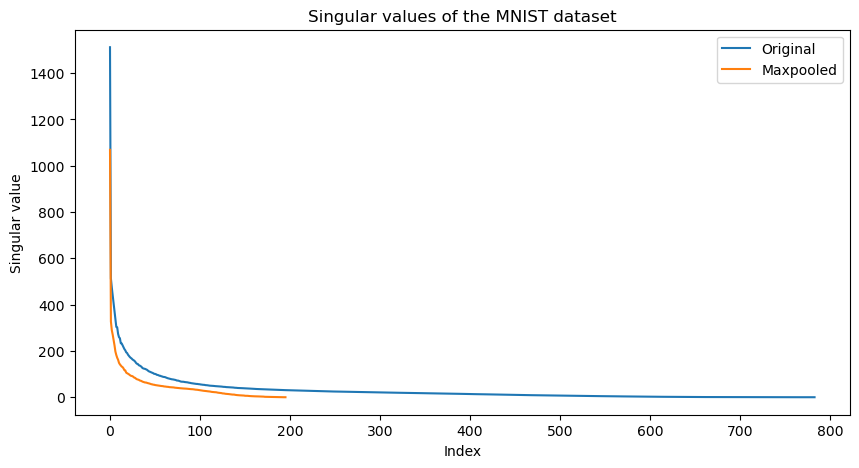

In [45]:
# Perform SVD on the maxpooled data
u_maxpool, s_maxpool, vh_maxpool = np.linalg.svd(data_matrix_maxpool, full_matrices=False)

# Plot the singular values beside the original singular values
plt.figure(figsize=(10, 5))
plt.plot(s, label='Original')
plt.plot(s_maxpool, label='Maxpooled')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.title('Singular values of the MNIST dataset')
plt.legend()
plt.show()


In [46]:
# Calculate the proportion of variance explained by the first 10 components
total_variance_maxpool = np.sum(s_maxpool**2)
explained_variance_maxpool = np.cumsum(s_maxpool**2) / total_variance_maxpool
explained_variance_maxpool_10 = explained_variance_maxpool[9]
print(f"Explained variance by first 10 components: {explained_variance_maxpool_10:.4f}")

Explained variance by first 10 components: 0.7923


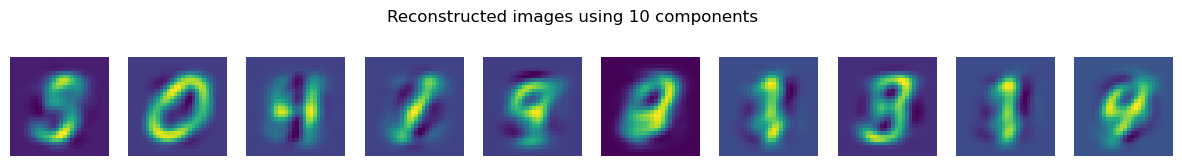

In [47]:
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(reconstructed_images_10[i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle('Reconstructed images using 10 components')
plt.show()

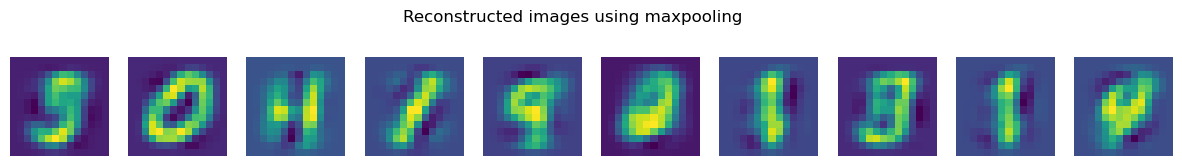

In [48]:
# reconstruct the original data using the first 10 components
reconstructed_images_maxpool = u_maxpool[:, :10] @ np.diag(s_maxpool[:10]) @ vh_maxpool[:10, :]
# plot the reconstructed images of the first 10 samples
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(reconstructed_images_maxpool[i].reshape(14, 14), cmap='viridis')
    plt.axis('off')
plt.suptitle('Reconstructed images using maxpooling')
plt.show()


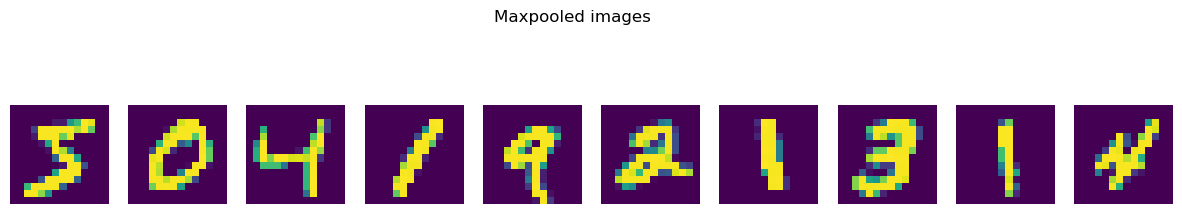

In [49]:
# plot the original maxpooled images
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(data_matrix_maxpool[i].reshape(14, 14), cmap='viridis')
    plt.axis('off')
plt.suptitle('Maxpooled images')
plt.show()

In [50]:
# calculate the reconstruction error between the original and reconstructed images
reconstruction_error_maxpool = np.linalg.norm(data_matrix_maxpool - reconstructed_images_maxpool, axis=1)

# calculate the average reconstruction error
average_reconstruction_error_maxpool = np.mean(reconstruction_error_maxpool)

print(f"Average reconstruction error using maxpooling: {average_reconstruction_error_maxpool:.4f}")

Average reconstruction error using maxpooling: 2.6364


## Informations summary

In [51]:
# information summary
# print the proportion of variance explained by the first 10 components
# print the average reconstruction error
# titles, var, error (separated by a tab)
print("Title\t\tVariance\tError")
print(f"Centered\t{original_variance_10:.4f}\t\t{average_reconstruction_error:.4f}")
print(f"Each digits\t{average_explained_variance_all_digits:.4f}\t\t{average_reconstruction_error_all_digits:.4f}")
print(f"Brightest \t{explained_variance_brightest_10:.4f}\t\t{average_reconstruction_error_brightest:.4f}")
print(f"Random shift\t{explained_variance_random_shift_10:.4f}\t\t{average_reconstruction_error_random_shift:.4f}")
print(f"Maxpooling\t{explained_variance_maxpool_10:.4f}\t\t{average_reconstruction_error_maxpool:.4f}")


Title		Variance	Error
Centered	0.6916		5.1306
Each digits	0.7988		4.1203
Brightest 	0.5579		8.8940
Random shift	0.5602		8.1188
Maxpooling	0.7923		2.6364


## Deskew the data

In [52]:
import cv2

# define deskew function
def deskew(image):
    # convert image to numpy array
    image = image.numpy().squeeze()

    # convert the scale of the image to 0-255
    image = (image * 255).astype(np.uint8)

    m = cv2.moments(image)
    if abs(m['mu02']) < 1e-2:
        return image.copy()
    
    skew = m['mu11'] / m['mu02']
    M = np.float32([[1, skew, -0.5 * 28 * skew], [0, 1, 0]])
    image_deskewed = cv2.warpAffine(image, M, (28, 28), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
    return image_deskewed/255.0

# for each row in original data matrix, deskew the image
data_matrix_deskewed = []
for image in data_matrix:
    image_tensor = torch.tensor(image).view(28, 28)
    deskewed_image = deskew(image_tensor)
    data_matrix_deskewed.append(deskewed_image.flatten())

# Convert deskewed data to a numpy array
data_matrix_deskewed = np.array(data_matrix_deskewed)

# Perform SVD on the deskewed data
u_deskewed, s_deskewed, vh_deskewed = np.linalg.svd(data_matrix_deskewed, full_matrices=False)

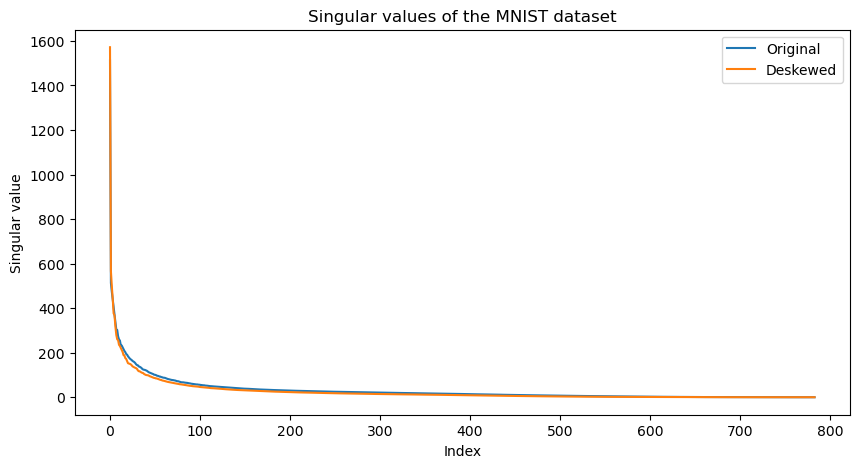

In [53]:
# Plot the singular values beside the original singular values
plt.figure(figsize=(10, 5))
plt.plot(s, label='Original')
plt.plot(s_deskewed, label='Deskewed')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.title('Singular values of the MNIST dataset')
plt.legend()
plt.show()



In [54]:
# Calculate the proportion of variance explained by the first 10 components
total_variance_deskewed = np.sum(s_deskewed**2)
explained_variance_deskewed = np.cumsum(s_deskewed**2) / total_variance_deskewed
explained_variance_deskewed_10 = explained_variance_deskewed[9]
print(f"Explained variance by first 10 components: {explained_variance_deskewed_10:.4f}")

Explained variance by first 10 components: 0.7642


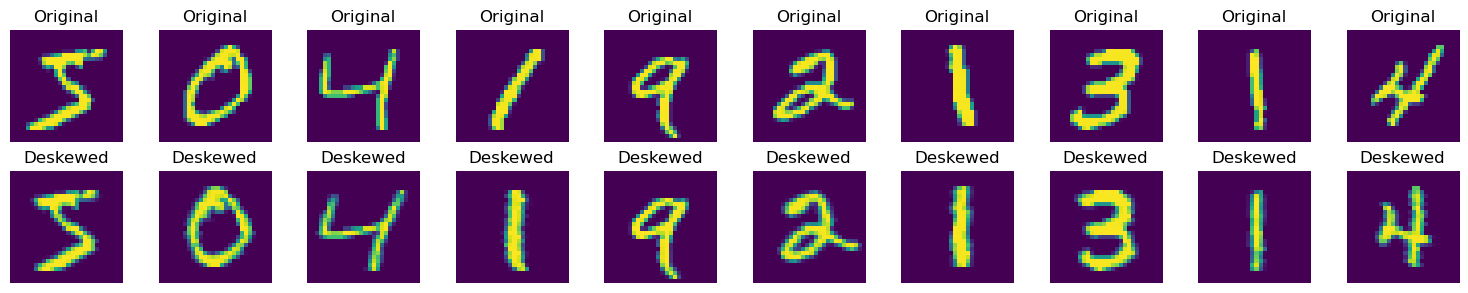

In [55]:
# visualize the first 10 images, original and deskewed
# from the origianl data matrix and data_matrix_deskewed
original_images = data_matrix[:10].reshape(-1, 28, 28)
deskewed_images = data_matrix_deskewed[:10].reshape(-1, 28, 28)

plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(original_images[i], cmap='viridis')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, 10, i + 11)
    plt.imshow(deskewed_images[i], cmap='viridis')
    plt.title('Deskewed')
    plt.axis('off')

plt.tight_layout()
plt.show()


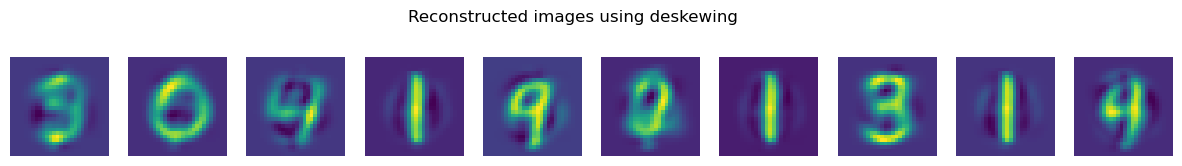

In [56]:
# reconstruct the original data using the first 10 components
reconstructed_images_deskewed = u_deskewed[:, :10] @ np.diag(s_deskewed[:10]) @ vh_deskewed[:10, :]
# plot the reconstructed images of the first 10 samples
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(reconstructed_images_deskewed[i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle('Reconstructed images using deskewing')
plt.show()


In [57]:
# calculate the reconstruction error between the original and reconstructed images
reconstruction_error_deskewed = np.linalg.norm(data_matrix - reconstructed_images_deskewed, axis=1)

# calculate the average reconstruction error
average_reconstruction_error_deskewed = np.mean(reconstruction_error_deskewed)
print(f"Average reconstruction error using deskewing: {average_reconstruction_error_deskewed:.4f}")

Average reconstruction error using deskewing: 5.8528


## Binary thresholding

In [58]:
# define the function to binary threshold the image
def binary_threshold(image, threshold=0.5):
    image = image.numpy().squeeze()

    # apply binary thresholding
    binary_image = (image > threshold).astype(float)

    return binary_image

# for each row in original data matrix, apply binary thresholding
data_matrix_binary = []
for image in data_matrix:
    image_tensor = torch.tensor(image).view(28, 28)
    binary_image = binary_threshold(image_tensor)
    data_matrix_binary.append(binary_image.flatten())

# Convert binary data to a numpy array
data_matrix_binary = np.array(data_matrix_binary)

# Perform SVD on the binary data
u_binary, s_binary, vh_binary = np.linalg.svd(data_matrix_binary, full_matrices=False)

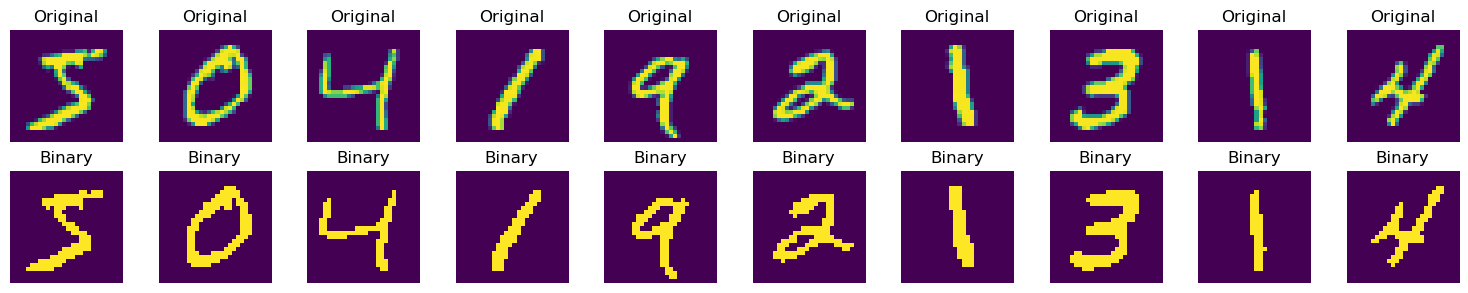

In [59]:
# visualize the first 10 images, original and binary thresholded
# from the origianl data matrix and data_matrix_binary
binary_images = data_matrix_binary[:10].reshape(-1, 28, 28)

plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(original_images[i], cmap='viridis')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, 10, i + 11)
    plt.imshow(binary_images[i], cmap='viridis')
    plt.title('Binary')
    plt.axis('off') 

plt.tight_layout()
plt.show()

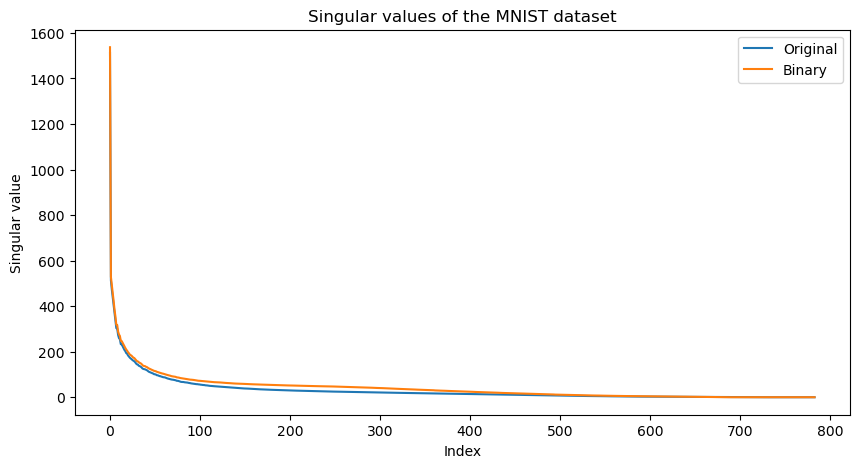

In [60]:
# plot the singular values of the original and binary thresholded data
plt.figure(figsize=(10, 5))
plt.plot(s, label='Original')
plt.plot(s_binary, label='Binary')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.title('Singular values of the MNIST dataset')
plt.legend()
plt.show()


In [61]:
# Calculate the proportion of variance explained by the first 10 components
total_variance_binary = np.sum(s_binary**2)
explained_variance_binary = np.cumsum(s_binary**2) / total_variance_binary
explained_variance_binary_10 = explained_variance_binary[9]
print(f"Explained variance by first 10 components: {explained_variance_binary_10:.4f}")


Explained variance by first 10 components: 0.6163


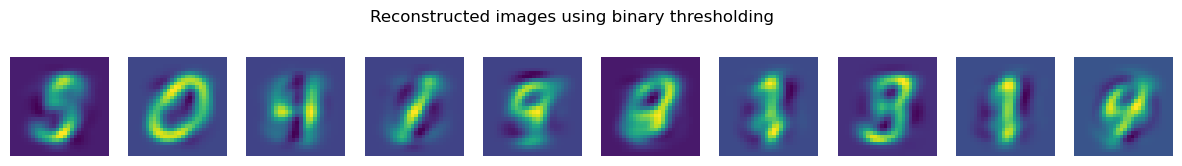

In [62]:
# reconstruct the original data using the first 10 components
reconstructed_images_binary = u_binary[:, :10] @ np.diag(s_binary[:10]) @ vh_binary[:10, :]
# plot the reconstructed images of the first 10 samples
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(reconstructed_images_binary[i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle('Reconstructed images using binary thresholding')
plt.show()

In [63]:
# calculate the reconstruction error between the original and reconstructed images
reconstruction_error_binary = np.linalg.norm(data_matrix - reconstructed_images_binary, axis=1)

# calculate the average reconstruction error
average_reconstruction_error_binary = np.mean(reconstruction_error_binary)
print(f"Average reconstruction error using binary thresholding: {average_reconstruction_error_binary:.4f}")

Average reconstruction error using binary thresholding: 5.1576


## Noise reduction

In [64]:
# perform noise reduction by applying a median filter
def median_filter(image, kernel_size=3):
    image = image.numpy().squeeze()

    # apply median filter
    filtered_image = cv2.medianBlur(image, kernel_size)

    return filtered_image

# for each row in original data matrix, apply median filter
data_matrix_filtered = []
for image in data_matrix:
    image_tensor = torch.tensor(image).view(28, 28)
    filtered_image = median_filter(image_tensor)
    data_matrix_filtered.append(filtered_image.flatten())

# Convert filtered data to a numpy array
data_matrix_filtered = np.array(data_matrix_filtered)

# Perform SVD on the filtered data
u_filtered, s_filtered, vh_filtered = np.linalg.svd(data_matrix_filtered, full_matrices=False)

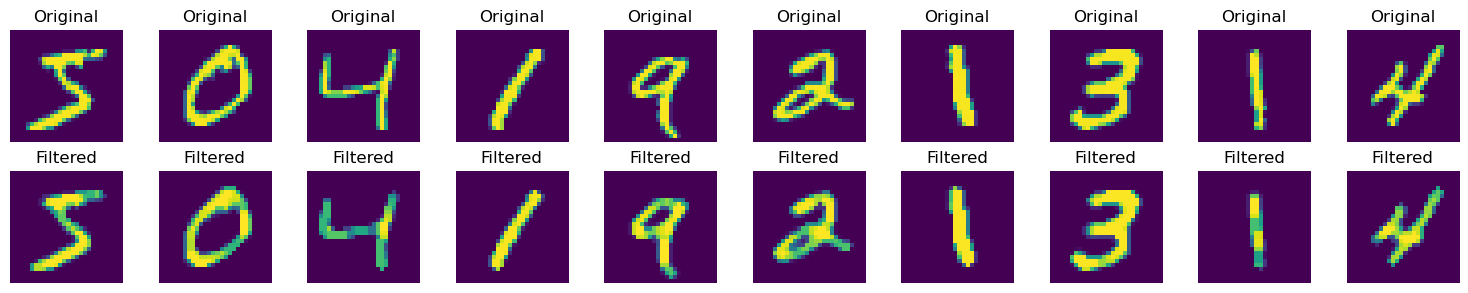

In [65]:
# visualize the first 10 images, original and filtered
# from the origianl data matrix and data_matrix_filtered
filtered_images = data_matrix_filtered[:10].reshape(-1, 28, 28)

plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(original_images[i], cmap='viridis')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, 10, i + 11)
    plt.imshow(filtered_images[i], cmap='viridis')
    plt.title('Filtered')
    plt.axis('off')

plt.tight_layout()
plt.show()

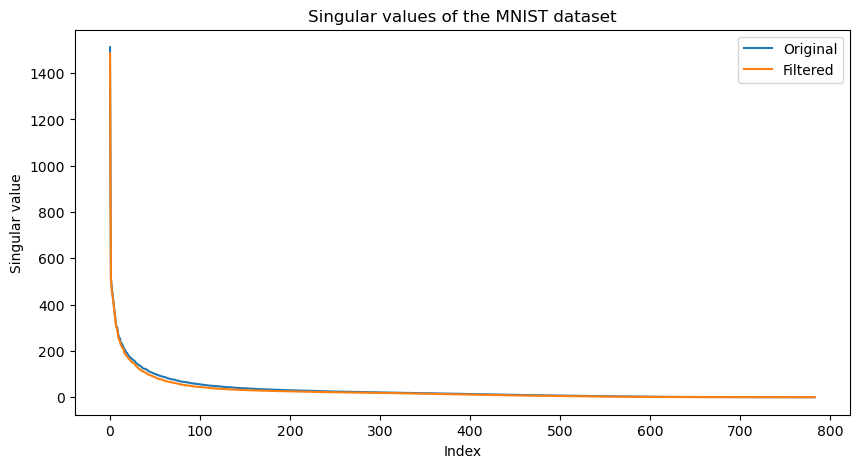

In [66]:
# plot the singular values of the original and filtered data
plt.figure(figsize=(10, 5))
plt.plot(s, label='Original')
plt.plot(s_filtered, label='Filtered')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.title('Singular values of the MNIST dataset')
plt.legend()
plt.show()


In [67]:
# Calculate the proportion of variance explained by the first 10 components
total_variance_filtered = np.sum(s_filtered**2)
explained_variance_filtered = np.cumsum(s_filtered**2) / total_variance_filtered
explained_variance_filtered_10 = explained_variance_filtered[9]
print(f"Explained variance by first 10 components: {explained_variance_filtered_10:.4f}")


Explained variance by first 10 components: 0.7328


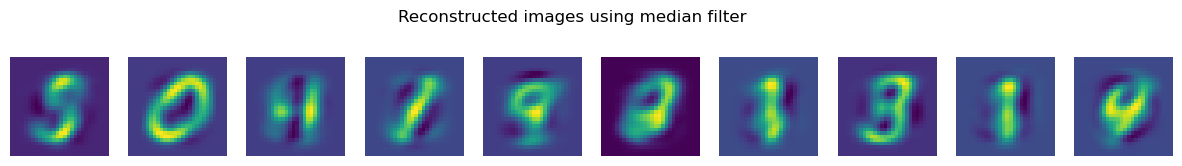

In [68]:
# reconstruct the original data using the first 10 components
reconstructed_images_filtered = u_filtered[:, :10] @ np.diag(s_filtered[:10]) @ vh_filtered[:10, :]
# plot the reconstructed images of the first 10 samples
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(reconstructed_images_filtered[i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle('Reconstructed images using median filter')
plt.show()


In [69]:
# calculate the reconstruction error between the original and reconstructed images
reconstruction_error_filtered = np.linalg.norm(data_matrix - reconstructed_images_filtered, axis=1)

# calculate the average reconstruction error
average_reconstruction_error_filtered = np.mean(reconstruction_error_filtered)
print(f"Average reconstruction error using median filter: {average_reconstruction_error_filtered:.4f}")


Average reconstruction error using median filter: 5.1826


# Original data (Random shifting), Centered, Centered + deskewed, Centered + Maxpooling, Centered + binary thresholding, Centered + median filter, Centered + deskewed + median filter

## Conclusion

Title		Variance	Error
Original(C)	0.6916		5.1306
Random shift	0.5602		8.1188
Each digit	0.7988		4.1203
Deskewing	0.7642		5.8528
Median filter	0.7328		5.1826

Maxpooling	0.7923		2.6364


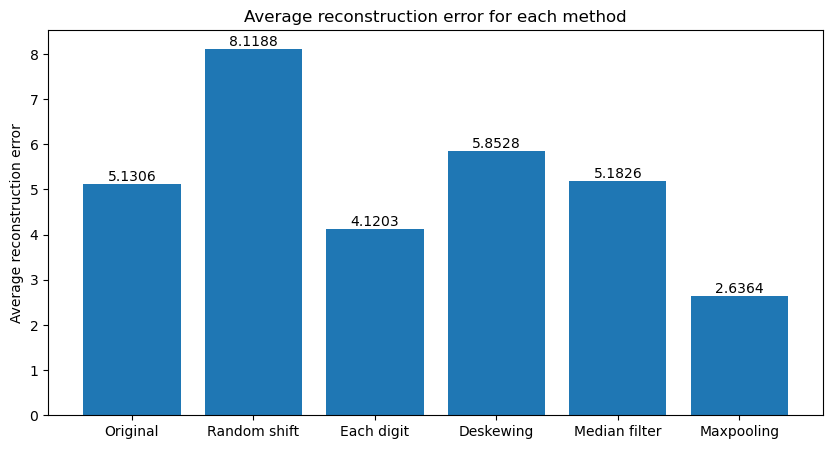

In [70]:
# original
# random shift
# each digit
# deskewing
# median filter
# maxpooling

# print all the explained variance by the first 10 components
# print all the average reconstruction errors
print("Title\t\tVariance\tError")
print(f"Original(C)\t{original_variance_10:.4f}\t\t{average_reconstruction_error:.4f}")
print(f"Random shift\t{explained_variance_random_shift_10:.4f}\t\t{average_reconstruction_error_random_shift:.4f}")
print(f"Each digit\t{average_explained_variance_all_digits:.4f}\t\t{average_reconstruction_error_all_digits:.4f}")
print(f"Deskewing\t{explained_variance_deskewed_10:.4f}\t\t{average_reconstruction_error_deskewed:.4f}")
print(f"Median filter\t{explained_variance_filtered_10:.4f}\t\t{average_reconstruction_error_filtered:.4f}")
print()
print(f"Maxpooling\t{explained_variance_maxpool_10:.4f}\t\t{average_reconstruction_error_maxpool:.4f}")

# plot a bar chart of the average reconstruction errors
# for each method
methods = ['Original', 'Random shift', 'Each digit', 'Deskewing', 'Median filter', 'Maxpooling']
errors = [average_reconstruction_error, average_reconstruction_error_random_shift, average_reconstruction_error_all_digits, average_reconstruction_error_deskewed, average_reconstruction_error_filtered, average_reconstruction_error_maxpool]

# plot the bar chart, size of the figure (10, 5)
# x-axis: methods, y-axis: errors
# show the actual value on top of each bar

plt.figure(figsize=(10, 5))
plt.bar(methods, errors)
for i, error in enumerate(errors):
    plt.text(i, error, f"{error:.4f}", ha='center', va='bottom')
plt.ylabel('Average reconstruction error')
plt.title('Average reconstruction error for each method')
plt.show()






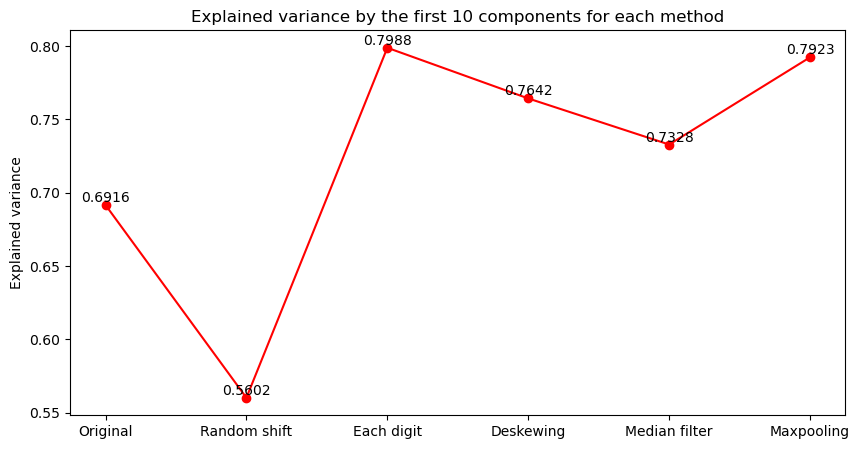

In [71]:
# plot a line chart of the explained variance by the first 10 components
# for each method
methods = ['Original', 'Random shift', 'Each digit', 'Deskewing', 'Median filter', 'Maxpooling']
variances = [original_variance_10, explained_variance_random_shift_10, average_explained_variance_all_digits, explained_variance_deskewed_10, explained_variance_filtered_10, explained_variance_maxpool_10]

# plot the line chart, size of the figure (10, 5)
# x-axis: methods, y-axis: variances
# show the actual value on top of each point
# dotted line for the original variance

plt.figure(figsize=(10, 5))
plt.plot(methods, variances, color='red', marker='o')
for i, variance in enumerate(variances):
    plt.text(i, variance, f"{variance:.4f}", ha='center', va='bottom')
plt.ylabel('Explained variance')
plt.title('Explained variance by the first 10 components for each method')

plt.show()




Method		Variance	Error
Random shift 	0.5602		8.1188
Original(C) 	0.6916		5.1306
Median filter 	0.7328		5.1826
Deskewing 	0.7642		5.8528
Maxpooling 	0.7923		2.6364
Each digit 	0.7988		4.1203


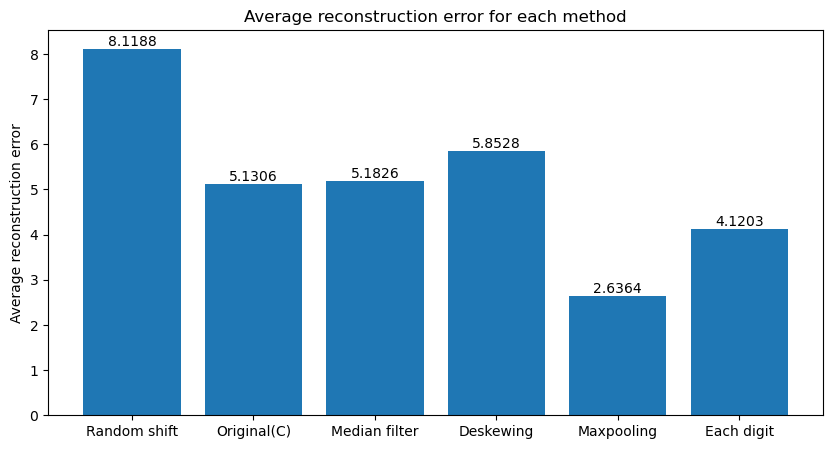

In [72]:
# create a dictionary to store the results 
results = {'Original(C)': (original_variance_10, average_reconstruction_error),
           'Random shift': (explained_variance_random_shift_10, average_reconstruction_error_random_shift),
           'Each digit': (average_explained_variance_all_digits, average_reconstruction_error_all_digits),
           'Deskewing': (explained_variance_deskewed_10, average_reconstruction_error_deskewed),
           'Median filter': (explained_variance_filtered_10, average_reconstruction_error_filtered),
           'Maxpooling': (explained_variance_maxpool_10, average_reconstruction_error_maxpool)}

# sort the results by the explained variance by the first 10 components, from low to high
sorted_results = sorted(results.items(), key=lambda x: x[1][0], reverse=False)

# print the sorted results
print("Method\t\tVariance\tError")
for method, (variance, error) in sorted_results:
    print(f"{method} \t{variance:.4f}\t\t{error:.4f}")

# plot a bar chart of the average reconstruction errors
# for each method
methods = [method for method, _ in sorted_results]
variances = [variance for _, (variance, _) in sorted_results]
errors = [error for _, (_, error) in sorted_results]

# plot the bar chart, size of the figure (10, 5)
# x-axis: methods, y-axis: errors
# show the actual value on top of each bar

plt.figure(figsize=(10, 5))
plt.bar(methods, errors)
for i, error in enumerate(errors):
    plt.text(i, error, f"{error:.4f}", ha='center', va='bottom')
plt.ylabel('Average reconstruction error')
plt.title('Average reconstruction error for each method')
plt.show()




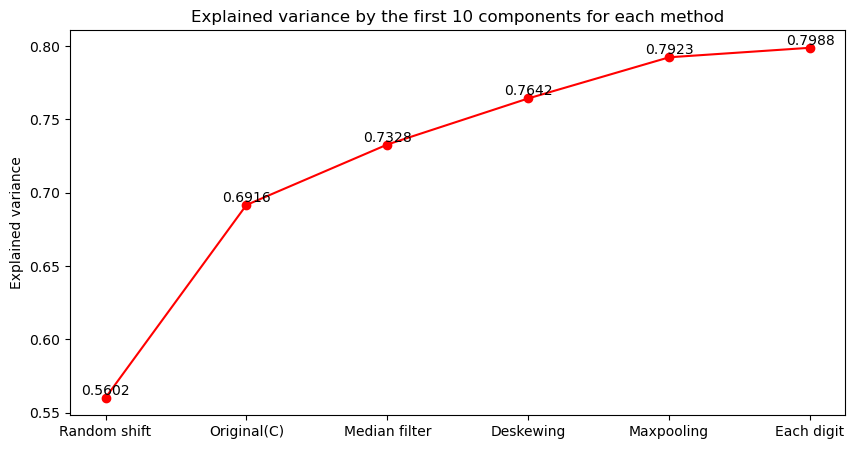

In [73]:
# plot a line chart of the explained variance by the first 10 components
# for each method
# plot the line chart, size of the figure (10, 5)
# x-axis: methods, y-axis: variances
# show the actual value on top of each point
# dotted line for the original variance

plt.figure(figsize=(10, 5))
plt.plot(methods, variances, color='red', marker='o')
for i, variance in enumerate(variances):
    plt.text(i, variance, f"{variance:.4f}", ha='center', va='bottom')
plt.ylabel('Explained variance')
plt.title('Explained variance by the first 10 components for each method')

plt.show()